In [46]:
import numpy as np
import pandas as pd
import cv2
import PIL.Image as Image
import os
import matplotlib.pyplot as plt
import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers ,Sequential
from sklearn.model_selection import train_test_split
print("all set !")


all set !


In [47]:
import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos",origin = dataset_url,untar=True)
data_dir =pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/verma/.keras/datasets/flower_photos')

In [48]:
path= "C:/Users/verma/.keras/datasets/flower_photos"
path

'C:/Users/verma/.keras/datasets/flower_photos'

In [49]:
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/verma/.keras/datasets/flower_photos')

In [50]:
for i in data_dir.iterdir():
    print(i)

C:\Users\verma\.keras\datasets\flower_photos\daisy
C:\Users\verma\.keras\datasets\flower_photos\dandelion
C:\Users\verma\.keras\datasets\flower_photos\flower_photos
C:\Users\verma\.keras\datasets\flower_photos\LICENSE.txt
C:\Users\verma\.keras\datasets\flower_photos\roses
C:\Users\verma\.keras\datasets\flower_photos\sunflowers
C:\Users\verma\.keras\datasets\flower_photos\tulips


In [51]:
## preparing dataset

flower_dist ={
    "roses":list(data_dir.glob("roses/*")),
    "daisy":list(data_dir.glob("daisy/*")),
    "sunflowers":list(data_dir.glob("sunflowers/*")),
    "dandelion":list(data_dir.glob("dandelion/*")),
    "tulips":list(data_dir.glob("tulips/*")),
}

In [52]:
flowers_label = {"roses":0,"daisy":1,"sunflowers":2,"dandelion":3,"tulips":4}

In [53]:
flower_dist["roses"][0]

WindowsPath('C:/Users/verma/.keras/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

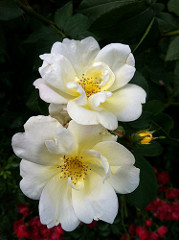

In [54]:
Image.open(flower_dist["roses"][0])

In [55]:
no_of_classes = len(flower_dist.items())
no_of_classes

5

In [56]:
x , y = [], []
for key , value in flower_dist.items():
    for item in value:
        img = cv2.imread(str(item))
        reduced_image = cv2.resize(img, (224,224))
        x.append(reduced_image)
        y.append(flowers_label[key])

In [57]:
x=np.array(x)
y=np.array(y)

In [58]:
x.shape, y.shape

((3670, 224, 224, 3), (3670,))

In [59]:

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [60]:
## normalise 

X_train_scaled = X_train/255
X_test_scaled = X_test/255

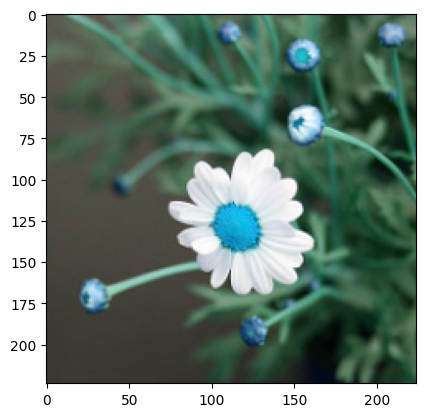

In [61]:
plt.imshow(X_train_scaled[78])
plt.show()

In [ ]:
## cnn model 
model = Sequential([
    ## convo layers
    layers.Conv2D(32,(3,3)),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Conv2D(64,(3,3), activation="relu"),
    
    layers.Flatten(),

    layers.Dense(64,activation="relu"),
    layers.Dense(no_of_classes, activation="softmax"),

])

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)